# House Prices: Advanced Regression Techniques
[캐글]: https://www.kaggle.com/c/house-prices-advanced-regression-techniques <br>
[참고 커널모음] :https://subinium.github.io/kaggle-tutorial/house-prices <br>

#### Python Tutorials
아래 튜토리얼 하나씩 필사할 예정

> * Comprehensive Data Exploration with Python (필사 시작일 : 2020-09-01)
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

> * House Prices EDA
https://www.kaggle.com/dgawlik/house-prices-eda

> * A Study on Regression Applied to the Ames Dataset
https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset

> * Regularized Linear Models
https://www.kaggle.com/apapiu/regularized-linear-models


--------------------------------------------------------------------------------------------------
## What I learned
* type here

--------------------------------------------------------------------------------------------------



In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [17]:
df_train = pd.read_csv('./data/train.csv')
df_submission=pd.read_csv('./data/sample_submission.csv')
df_test=pd.read_csv('./data/test.csv')

In [16]:
df_submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [13]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

--------------------------------------------------------------------------------------------------
### 1. So... What can we expect?
* Variable
* Type - 여기서는 numerical, categorical 두가지 타입이 있다. 
* Segment - building(e.g. 'OverallQual'), space(e.g. 'TotalBsmtSF'), location(e.g. 'Neighborhood') 세가지 분류로 변수를 나눠볼수있다.
* Expectation - 변수가 'SalePrice'에 영향을 미친다는 기대를 갖고있다. 
* Conclusion 

--------------------------------------------------------------------------------------------------
### 2. First things first: analysing 'SalePrice'

In [19]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

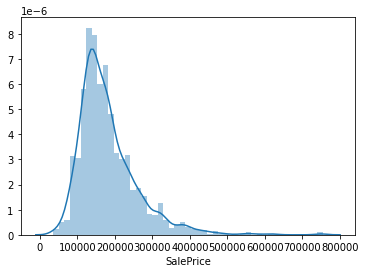

In [20]:
sns.distplot(df_train['SalePrice'])

In [22]:
#skewness and kurtosis
## 왜도, 첨도
print("Skewness: %f" % df_train['SalePrice'].skew())
print('Kurtosis: %f' % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


#### Relationship with numerical variables

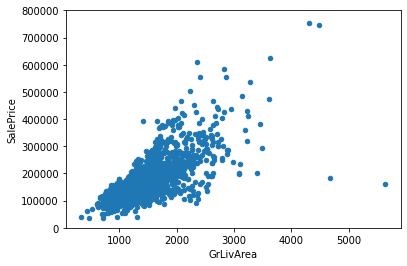

In [25]:
#scatter plot grlivarea/saleprice
var='GrLivArea'
data=pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

'SalePrice' 와 'GrLivArea' 사이에는 선형관계가 있는것으로 보여짐.

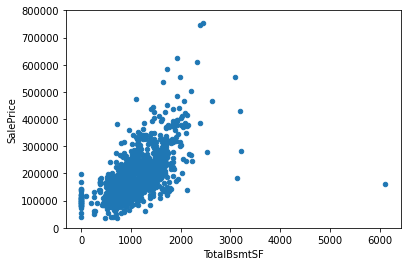

In [26]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

#### Relationship with categorical features